In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC

In [3]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.keys())

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])


In [4]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [8]:
faces.images.shape

(1348, 62, 47)

In [11]:
faces.data.shape, faces.target.shape

((1348, 2914), (1348,))

In [10]:
type(faces.data)

numpy.ndarray

#### enumerate in python

It creates a tuple where the first element is the index/counter value and 2nd value is the actual value

In [16]:
li = ["eat", "code", "sleep", "repeat"]
list(enumerate(li))

[(0, 'eat'), (1, 'code'), (2, 'sleep'), (3, 'repeat')]

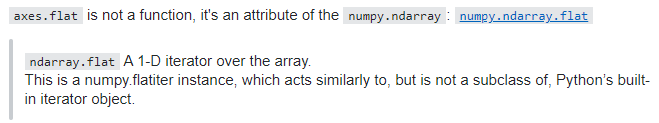

(matplotlib.figure.Figure, numpy.ndarray, 2, numpy.flatiter)

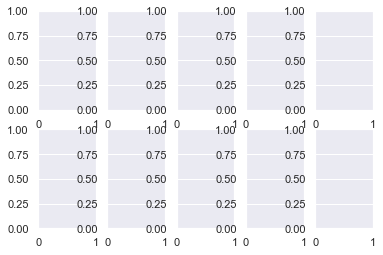

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=5)
type(fig), type(ax), ax.ndim, type(ax.flat)

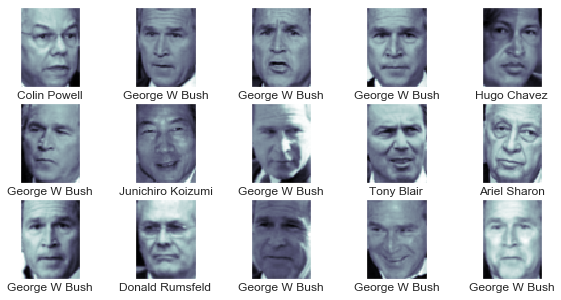

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(10,5))
for idx, axi in enumerate(ax.flat):
    axi.imshow(faces.images[idx], cmap="bone")
    axi.set(xticks = [], yticks = [],
            xlabel = faces.target_names[faces.target[idx]])

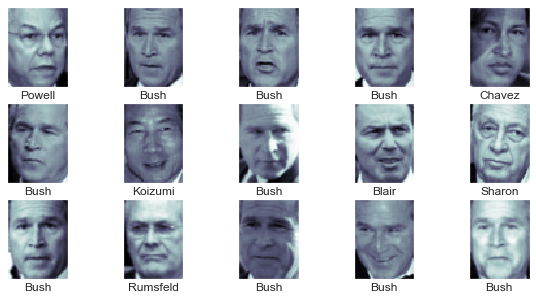

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(10,5))
for idx, axi in enumerate(ax.flat):
    axi.imshow(faces.images[idx], cmap="bone")
    axi.set(xticks = [], yticks = [],
            xlabel = faces.target_names[faces.target[idx]].split()[-1])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(faces.data,
                                                    faces.target,
                                                    random_state=42,
                                                    shuffle=True,
                                                    test_size=0.2)

In [11]:
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [12]:
clf.score(X_test, y_test)

0.7666666666666667

In [16]:
y_pred = clf.predict(X_test)

In [23]:
print(faces.images.shape, X_test.shape)

(1348, 62, 47) (270, 2914)


In [24]:
62 * 47

2914

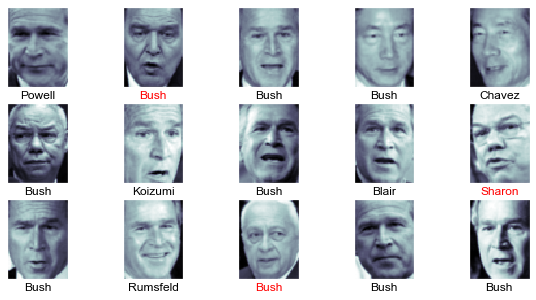

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(10,5))
for idx, axi in enumerate(ax.flat):
    axi.imshow(X_test[idx].reshape(62, 47), cmap="bone")
    axi.set(xticks = [], yticks = [])
    axi.set_xlabel(faces.target_names[faces.target[idx]].split()[-1],
                   color="black" if y_pred[idx] == y_test[idx] else "red")